# WORKING DOC

### Import Libraries and Dependencies

In [1]:
# Import libraries and dependencies
import os
import ccxt
import warnings
# import pyEX as p
import numpy as np
import pandas as pd
from pathlib import Path
from datetime import datetime
from dotenv import load_dotenv
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')
%matplotlib inline

### Import Environment Variables

In [2]:
# Load environment variables
load_dotenv()

# Import environment variables
kraken_public_key = os.getenv("KRAKEN_PUBLIC_KEY")
kraken_secret_key = os.getenv("KRAKEN_SECRET_KEY")

# Verify that environment variables were loaded
print(f"Kraken key data type: {type(kraken_public_key)}")
print(f"Kraken secren data type: {type(kraken_secret_key)}")

Kraken key data type: <class 'NoneType'>
Kraken secren data type: <class 'NoneType'>


### Set Public and Private Keys for Kraken Exchange via the CCXT library

In [3]:
# Set the public and private keys for the API
exchange = ccxt.kraken({
    'apiKey': kraken_public_key,
    'secret': kraken_secret_key,
})

### Connect to Kraken and Load Available Cyptocurrency Data

In [4]:
# Connect to Kraken and load the available cryptocurrencies
crypto_details = exchange.load_markets()
crypto_details['BTC/USD']['symbol']

'BTC/USD'

### Fetch Historical Data for LINK/USDT
Note: Other options include ADA, BCH, DAI, DOT, EOS, ETH, LINK, LTC, USDC, BTC, DOGE and XRP

In [5]:
# Fetch daily candlestick bar data from `BTC/USD`
historical_prices = exchange.fetch_ohlcv("LINK/USDT", "1h")
historical_prices[2]

[1620198000000, 49.34722, 51.09462, 49.33577, 50.0, 3174.1441838]

In [6]:
# Import the data as a Pandas DataFrame and set the columns
historical_prices_df = pd.DataFrame(
    historical_prices, 
    columns=["timestamp", "open", "high", "low", "close", "volume"]
)

display(historical_prices_df.head())
display()
display("____________________________________")
display()
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume
0,1620190800000,47.82112,49.00895,47.75551,48.82000,1873.519101
1,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869
2,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184
3,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275
4,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836


'____________________________________'

'historical_prices_df shape: (720, 6)'

### Convert Epoch Timestamp to Readable Date Format

In [7]:
# Convert epoch timestamp to date using the `to_datetime` function and `unit` parameter
historical_prices_df["date"] = pd.to_datetime(
    historical_prices_df["timestamp"], 
    unit="ms"
)

# UNIT ARGUEMENTS COULD INCLUDE: (ms,us,ns) 

display(historical_prices_df.head())
display("_________________________")
display(f"historical_prices_df shape: {historical_prices_df.shape}")

,timestamp,open,high,low,close,volume,date
0,1620190800000,47.82112,49.00895,47.75551,48.82000,1873.519101,2021-05-05 05:00:00
1,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869,2021-05-05 06:00:00
2,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184,2021-05-05 07:00:00
3,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00
4,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00


'_________________________'

'historical_prices_df shape: (720, 7)'

In [8]:
# historical_prices_df = historical_prices_df.set_index('date')
historical_prices_df.set_index(pd.to_datetime(
    historical_prices_df['date'], 
    infer_datetime_format=True), 
    inplace=True
)
historical_prices_df

,timestamp,open,high,low,close,volume,date
date,,,,,,,
2021-05-05 05:00:00,1620190800000,47.82112,49.00895,47.75551,48.82000,1873.519101,2021-05-05 05:00:00
2021-05-05 06:00:00,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869,2021-05-05 06:00:00
2021-05-05 07:00:00,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184,2021-05-05 07:00:00
2021-05-05 08:00:00,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00
...,...,...,...,...,...,...,...
2021-06-04 00:00:00,1622764800000,32.06059,32.06059,31.37175,31.43673,744.859119,2021-06-04 00:00:00
2021-06-04 01:00:00,1622768400000,31.33775,31.34439,26.65951,29.73656,30348.457802,2021-06-04 01:00:00
2021-06-04 02:00:00,1622772000000,29.80384,29.99763,29.01036,29.96227,4181.890875,2021-06-04 02:00:00


### Plot Daily Returns

In [9]:
# Drop NAs and calculate daily percent return
historical_prices_df['daily_return'] = historical_prices_df['close'].pct_change()
historical_prices_df = historical_prices_df.dropna() 
historical_prices_df

,timestamp,open,high,low,close,volume,date,daily_return
date,,,,,,,,
2021-05-05 06:00:00,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869,2021-05-05 06:00:00,0.003856
2021-05-05 07:00:00,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184,2021-05-05 07:00:00,0.020236
2021-05-05 08:00:00,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00,-0.010436
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436
...,...,...,...,...,...,...,...,...
2021-06-04 00:00:00,1622764800000,32.06059,32.06059,31.37175,31.43673,744.859119,2021-06-04 00:00:00,-0.023310
2021-06-04 01:00:00,1622768400000,31.33775,31.34439,26.65951,29.73656,30348.457802,2021-06-04 01:00:00,-0.054082
2021-06-04 02:00:00,1622772000000,29.80384,29.99763,29.01036,29.96227,4181.890875,2021-06-04 02:00:00,0.007590


### Construct Exponential Moving Average of Closing Prices (Trading Signal, Feature One)
#### 9, 20, 50, 200

In [10]:
# Set short and long windows


# Construct EMAS for short and long windows, respectively 9, 20, 50 and 200
historical_prices_df['EMA_9'] = historical_prices_df['close'].ewm(halflife=9).mean()
historical_prices_df['EMA_20'] = historical_prices_df['close'].ewm(halflife=20).mean()
historical_prices_df['EMA_50'] = historical_prices_df['close'].ewm(halflife=50).mean()
historical_prices_df['EMA_200'] = historical_prices_df['close'].ewm(halflife=200).mean()

# Construct a 9 VS 20 crossover trading signal
historical_prices_df['crossover_long_9v20'] = np.where(historical_prices_df['EMA_9'] > historical_prices_df['EMA_20'], 1.0, 0.0)
historical_prices_df['crossover_short_9v20'] = np.where(historical_prices_df['EMA_9'] < historical_prices_df['EMA_20'], -1.0, 0.0)
historical_prices_df['crossover_signal_9v20'] = historical_prices_df['crossover_long_9v20'] + historical_prices_df['crossover_short_9v20']


# Construct a 50 VS 200 crossover trading signal
historical_prices_df['crossover_long_50v200'] = np.where(historical_prices_df['EMA_50'] > historical_prices_df['EMA_200'], 1.0, 0.0)
historical_prices_df['crossover_short_50v200'] = np.where(historical_prices_df['EMA_50'] < historical_prices_df['EMA_200'], -1.0, 0.0)
historical_prices_df['crossover_signal_50v200'] = historical_prices_df['crossover_long_50v200'] + historical_prices_df['crossover_short_50v200']


historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,EMA_50,EMA_200,crossover_long_9v20,crossover_short_9v20,crossover_signal_9v20,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200
date,,,,,,,,,,,,,,,,,,
2021-05-05 06:00:00,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869,2021-05-05 06:00:00,0.003856,49.008270,49.008270,49.008270,49.008270,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 07:00:00,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184,2021-05-05 07:00:00,0.020236,49.523220,49.512727,49.507572,49.504994,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-05 08:00:00,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00,-0.010436,49.507037,49.500810,49.497639,49.496025,1.0,0.0,1.0,1.0,0.0,1.0
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,49.294153,49.302079,49.305699,49.307440,0.0,-1.0,-1.0,0.0,-1.0,-1.0
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436,49.048944,49.074025,49.085970,49.091843,0.0,-1.0,-1.0,0.0,-1.0,-1.0


In [11]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200


### Plot Exponential Moving Average of Closing Prices 9 VS 20

<AxesSubplot:xlabel='date'>

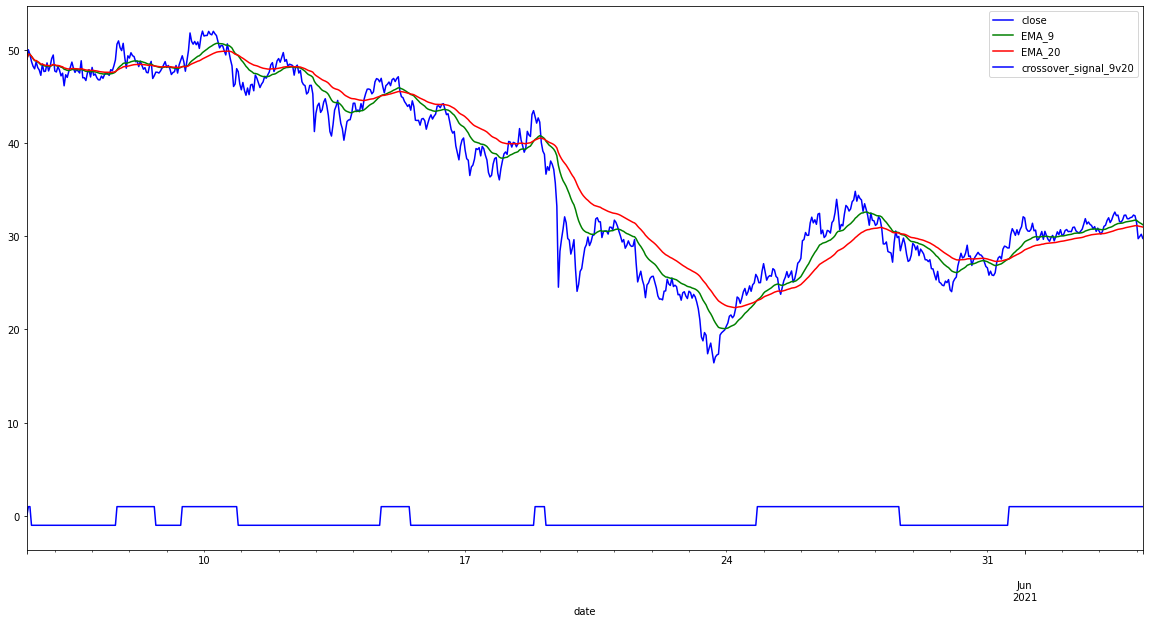

In [12]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'crossover_signal_9v20']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

In [13]:
### Plot Exponential Moving Average of Closing Prices 50 VS 200

<AxesSubplot:xlabel='date'>

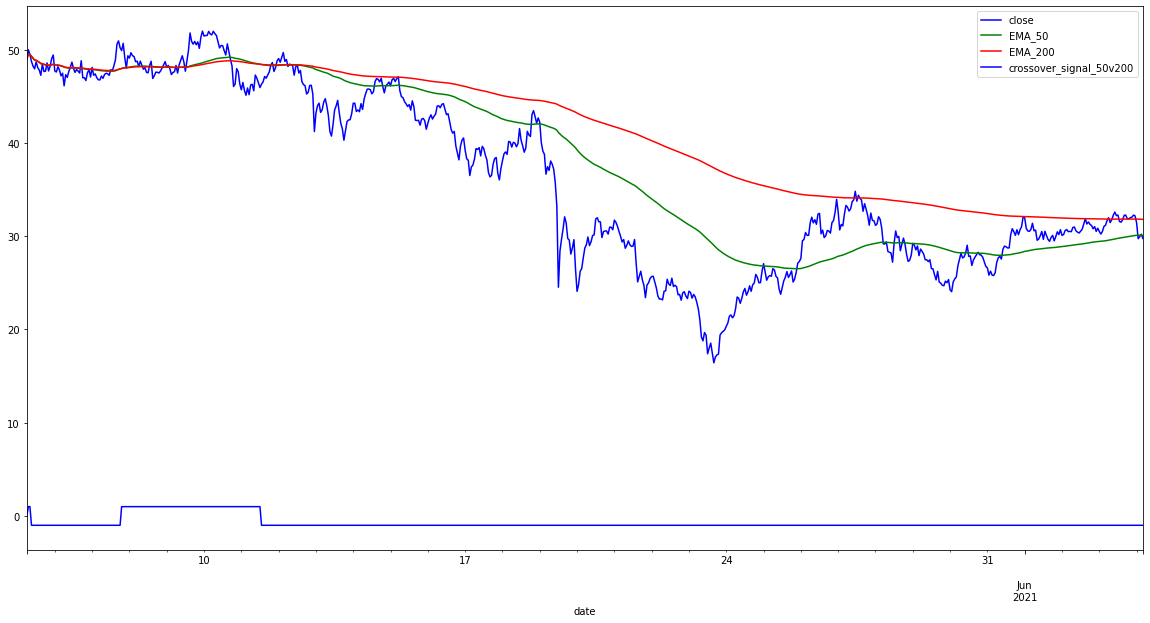

In [14]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_50', 'EMA_200', 'crossover_signal_50v200']].plot(figsize=(20,10), color=['b', 'g', 'r', 'b'])

<AxesSubplot:xlabel='date'>

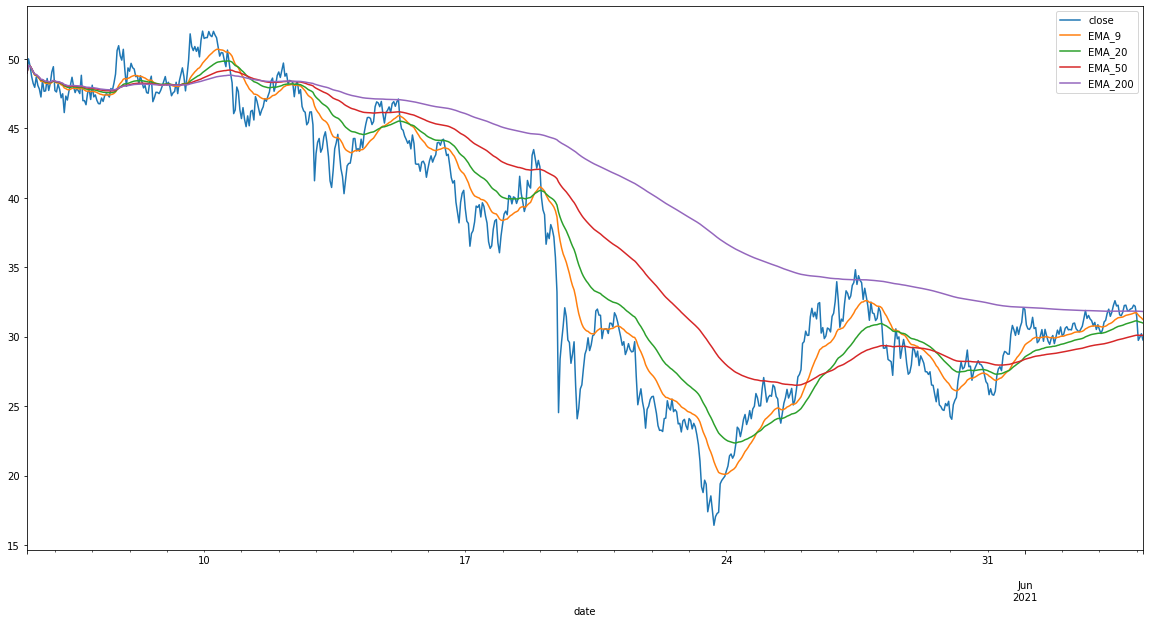

In [15]:
# Plot the EMA of BTC/USD closing prices
historical_prices_df[['close', 'EMA_9', 'EMA_20', 'EMA_50', 'EMA_200']].plot(figsize=(20,10))

### Construct Bollinger Band (Trading Signal, Feature Three)

In [16]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
historical_prices_df['bollinger_mid_band'] = historical_prices_df['close'].rolling(window=bollinger_window).mean()
historical_prices_df['bollinger_std'] = historical_prices_df['close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
historical_prices_df['bollinger_upper_band']  = historical_prices_df['bollinger_mid_band'] + (historical_prices_df['bollinger_std'] * 1)
historical_prices_df['bollinger_lower_band']  = historical_prices_df['bollinger_mid_band'] - (historical_prices_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
historical_prices_df['bollinger_long'] = np.where(historical_prices_df['close'] < historical_prices_df['bollinger_lower_band'], 1.0, 0.0)
historical_prices_df['bollinger_short'] = np.where(historical_prices_df['close'] > historical_prices_df['bollinger_upper_band'], -1.0, 0.0)
historical_prices_df['bollinger_signal'] = historical_prices_df['bollinger_long'] + historical_prices_df['bollinger_short']

historical_prices_df.iloc[50:60]

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,crossover_long_50v200,crossover_short_50v200,crossover_signal_50v200,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bollinger_long,bollinger_short,bollinger_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-07 08:00:00,1620374400000,46.94104,47.38023,46.65358,47.34165,1143.139948,2021-05-07 08:00:00,0.008629,47.397125,47.589655,...,0.0,-1.0,-1.0,47.371967,0.525001,47.896969,46.846966,0.0,0.0,0.0
2021-05-07 09:00:00,1620378000000,47.45089,47.61051,47.19472,47.48274,201.286647,2021-05-07 09:00:00,0.002980,47.403589,47.585293,...,0.0,-1.0,-1.0,47.367471,0.523575,47.891046,46.843896,0.0,0.0,0.0
2021-05-07 10:00:00,1620381600000,47.53277,47.76682,47.42537,47.42537,502.060293,2021-05-07 10:00:00,-0.001208,47.405231,47.578813,...,0.0,-1.0,-1.0,47.344913,0.510033,47.854946,46.834881,0.0,0.0,0.0
2021-05-07 11:00:00,1620385200000,47.18060,47.36372,46.90566,47.25575,1005.379015,2021-05-07 11:00:00,-0.003577,47.393975,47.565807,...,0.0,-1.0,-1.0,47.322064,0.502873,47.824937,46.819191,0.0,0.0,0.0
2021-05-07 12:00:00,1620388800000,47.18303,47.94481,46.76898,47.86636,684.574321,2021-05-07 12:00:00,0.012921,47.429504,47.577833,...,0.0,-1.0,-1.0,47.340185,0.516127,47.856313,46.824058,0.0,-1.0,-1.0
2021-05-07 13:00:00,1620392400000,47.92185,48.43207,47.73915,47.74488,1026.643578,2021-05-07 13:00:00,-0.002538,47.453199,47.584477,...,0.0,-1.0,-1.0,47.286430,0.395866,47.682296,46.890563,0.0,-1.0,-1.0
2021-05-07 14:00:00,1620396000000,47.82243,48.26374,47.45800,48.26374,285.279954,2021-05-07 14:00:00,0.010867,47.514035,47.611341,...,0.0,-1.0,-1.0,47.350011,0.445158,47.795169,46.904853,0.0,-1.0,-1.0
2021-05-07 15:00:00,1620399600000,48.07418,49.60169,48.01685,48.91242,8605.109763,2021-05-07 15:00:00,0.013440,47.618895,47.662517,...,0.0,-1.0,-1.0,47.445632,0.557291,48.002923,46.888341,0.0,-1.0,-1.0
2021-05-07 16:00:00,1620403200000,48.91247,51.01871,48.91247,50.59877,6927.099847,2021-05-07 16:00:00,0.034477,47.842152,47.777403,...,0.0,-1.0,-1.0,47.640570,0.874408,48.514978,46.766163,0.0,-1.0,-1.0


### Plot Bollinger Bands

<AxesSubplot:xlabel='date'>

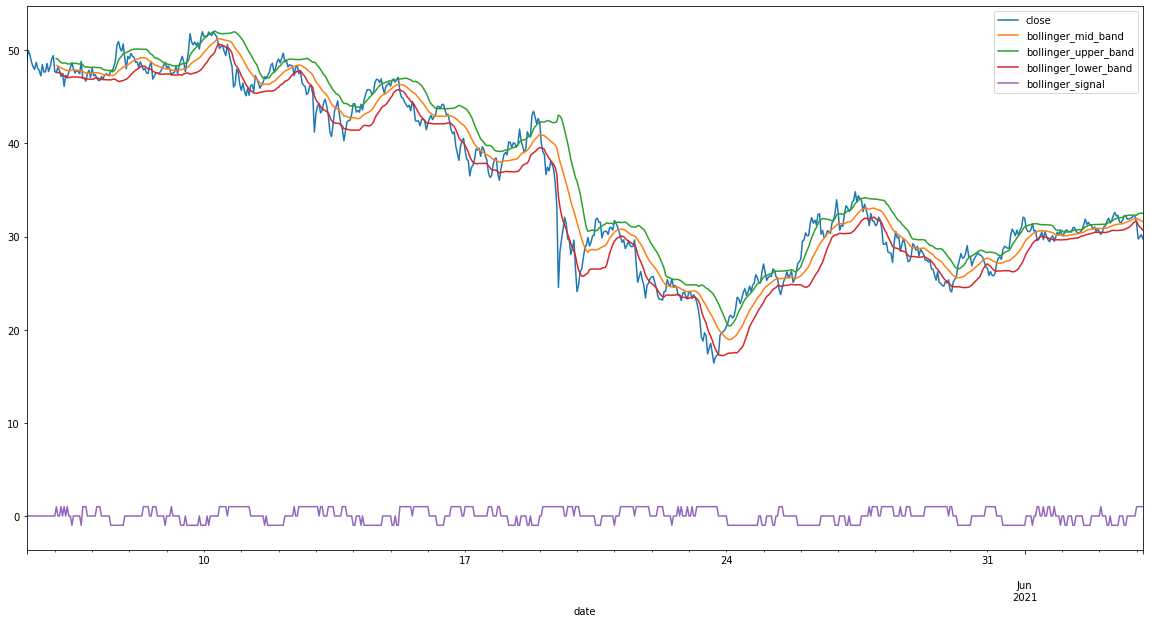

In [17]:
# Plot the Bollinger Bands for BTC/USD closing prices
historical_prices_df[['close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band', 'bollinger_signal']].plot(figsize=(20,10))

### Build MACD Signals

In [18]:

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
historical_prices_df['mac_fast_12'] = historical_prices_df['close'].ewm(span=12, adjust=False).mean()
historical_prices_df['mac_slow_26'] = historical_prices_df['close'].ewm(span=26, adjust=False).mean()

# Build the Macd line and the Signal Line
macd = historical_prices_df['mac_fast_12'] - historical_prices_df['mac_slow_26']
historical_prices_df['macd'] = macd
historical_prices_df['mac_signal_line_9ema'] = macd.ewm(span=9, adjust=False).mean()

# Calculate difference between macd and signal
macd_diff = historical_prices_df['macd'] - historical_prices_df['mac_signal_line_9ema']
historical_prices_df['macd_diff'] = macd_diff


# Construct a macd trading signal
historical_prices_df['macd_long'] = np.where(historical_prices_df['macd_diff'] > 0, 1.0, 0.0)
historical_prices_df['macd_short'] = np.where(historical_prices_df['macd_diff'] < 0, -1.0, 0.0)
historical_prices_df['macd_signal'] = historical_prices_df['macd_long'] + historical_prices_df['macd_short']


historical_prices_df.iloc[50:55]

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,bollinger_short,bollinger_signal,mac_fast_12,mac_slow_26,macd,mac_signal_line_9ema,macd_diff,macd_long,macd_short,macd_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-07 08:00:00,1620374400000,46.94104,47.38023,46.65358,47.34165,1143.139948,2021-05-07 08:00:00,0.008629,47.397125,47.589655,...,0.0,0.0,47.214620,47.429119,-0.214498,-0.213977,-0.000521,0.0,-1.0,-1.0
2021-05-07 09:00:00,1620378000000,47.45089,47.61051,47.19472,47.48274,201.286647,2021-05-07 09:00:00,0.002980,47.403589,47.585293,...,0.0,0.0,47.255870,47.433091,-0.177221,-0.206626,0.029405,1.0,0.0,1.0
2021-05-07 10:00:00,1620381600000,47.53277,47.76682,47.42537,47.42537,502.060293,2021-05-07 10:00:00,-0.001208,47.405231,47.578813,...,0.0,0.0,47.281947,47.432519,-0.150572,-0.195415,0.044843,1.0,0.0,1.0
2021-05-07 11:00:00,1620385200000,47.18060,47.36372,46.90566,47.25575,1005.379015,2021-05-07 11:00:00,-0.003577,47.393975,47.565807,...,0.0,0.0,47.277916,47.419425,-0.141509,-0.184634,0.043125,1.0,0.0,1.0
2021-05-07 12:00:00,1620388800000,47.18303,47.94481,46.76898,47.86636,684.574321,2021-05-07 12:00:00,0.012921,47.429504,47.577833,...,-1.0,-1.0,47.368446,47.452531,-0.084085,-0.164524,0.080439,1.0,0.0,1.0


<AxesSubplot:xlabel='date'>

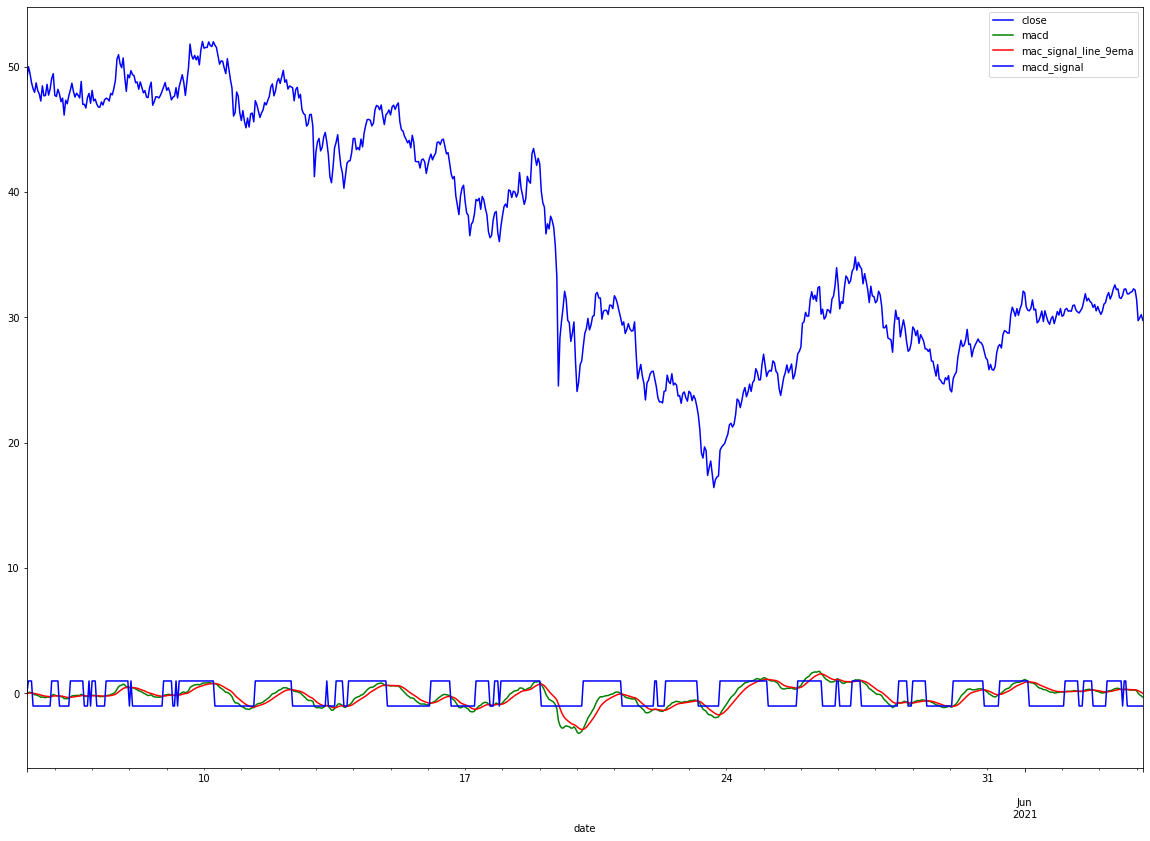

In [19]:
historical_prices_df[['close', 'macd','mac_signal_line_9ema', 'macd_signal']].plot(figsize=(20,14), color=['b', 'g', 'r', 'b'])

In [20]:
#### SAVE FOR LATER ####
### A conservative, yet effective way to use the macd is to exit your position the second the MACD-SIGNAL value starts to decrease.
###### i.e. if you're in a long position, and the mac

# historical_prices_df['macd_less_signal_slope'] = historical_prices_df.macd_less_signal.diff()
# historical_prices_df.head()

In [21]:
# historical_prices_df[['close','macd','macd_signal']].plot(figsize=(20,10))

# historical_prices_df[['macd_less_signal', 'macd_less_signal_slope', 'mac_signal']].plot(figsize=(20,10))
# plt.axhline(y=0, color='r', linestyle='-')


# SO, A CONSERVATIVE MACD SIGNAL WOULD SAY, CLOSE POSITION WHEN THE ORANGE LINE CROSSES BACK ABOVE THE ZERO LINE. 
# YOU EXIT YOUR POSITIONS EARLY AND OFTEN MISS BIG GAINS, HOWEVER, YOUR LIKELINESS TO TAKE HOME PROFIT IS HIGHER.

### Build RSI Signals

In [22]:
n = 14

def rma(x, n, y0):
    a = (n-1) / n
    ak = a**np.arange(len(x)-1, -1, -1)
    return np.r_[np.full(n, np.nan), y0, np.cumsum(ak * x) / ak / n + y0 * a**np.arange(1, len(x)+1)]

historical_prices_df['change'] = historical_prices_df['close'].diff()
historical_prices_df['gain'] = historical_prices_df.change.mask(historical_prices_df.change < 0, 0.0)
historical_prices_df['loss'] = -historical_prices_df.change.mask(historical_prices_df.change > 0, -0.0)
historical_prices_df['avg_gain'] = rma(historical_prices_df.gain[n+1:].to_numpy(), n, np.nansum(historical_prices_df.gain.to_numpy()[:n+1])/n)
historical_prices_df['avg_loss'] = rma(historical_prices_df.loss[n+1:].to_numpy(), n, np.nansum(historical_prices_df.loss.to_numpy()[:n+1])/n)
historical_prices_df['rs'] = historical_prices_df.avg_gain / historical_prices_df.avg_loss
historical_prices_df['rsi_14'] = 100 - (100 / (1 + historical_prices_df.rs))

historical_prices_df.head()


,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,macd_long,macd_short,macd_signal,change,gain,loss,avg_gain,avg_loss,rs,rsi_14
date,,,,,,,,,,,,,,,,,,,,,
2021-05-05 06:00:00,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869,2021-05-05 06:00:00,0.003856,49.008270,49.008270,...,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-05 07:00:00,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184,2021-05-05 07:00:00,0.020236,49.523220,49.512727,...,1.0,0.0,1.0,0.99173,0.99173,0.00000,NaN,NaN,NaN,NaN
2021-05-05 08:00:00,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00,-0.010436,49.507037,49.500810,...,1.0,0.0,1.0,-0.52182,0.00000,0.52182,NaN,NaN,NaN,NaN
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,49.294153,49.302079,...,1.0,0.0,1.0,-0.73259,0.00000,0.73259,NaN,NaN,NaN,NaN
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436,49.048944,49.074025,...,0.0,-1.0,-1.0,-0.50870,0.00000,0.50870,NaN,NaN,NaN,NaN


In [23]:
# Construct a rsi trading signal
historical_prices_df['rsi_oversold'] = np.where(historical_prices_df['rsi_14'] < 30, 1.0, 0.0)
historical_prices_df['rsi_overbought'] = np.where(historical_prices_df['rsi_14'] > 70, 1.0, 0.0)


# Set x variable list of features
rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold'] # NEED TO ADD 'rsi_signal',

historical_prices_df[rsi_list].iloc[70:80]
# historical_prices_df.head()

,close,daily_return,rs,rsi_14,rsi_overbought,rsi_oversold
date,,,,,,
2021-05-08 04:00:00,48.71955,-0.011164,0.983686,49.588788,0.0,0.0
2021-05-08 05:00:00,48.77291,0.001095,0.997496,49.937320,0.0,0.0
2021-05-08 06:00:00,48.19621,-0.011824,0.859363,46.218139,0.0,0.0
2021-05-08 07:00:00,48.78166,0.012147,1.010758,50.267504,0.0,0.0
2021-05-08 08:00:00,48.33974,-0.009059,0.899996,47.368308,0.0,0.0
2021-05-08 09:00:00,47.91219,-0.008845,0.807769,44.683197,0.0,0.0
2021-05-08 10:00:00,48.08427,0.003592,0.852186,46.009730,0.0,0.0
2021-05-08 11:00:00,47.57216,-0.010650,0.745992,42.725977,0.0,0.0
2021-05-08 12:00:00,47.52641,-0.000962,0.737155,42.434601,0.0,0.0


In [24]:
# Create a lagging window in which you get a buy/sell signal

rolling_periods = 10

rsi_list = ['close', 'daily_return', 'rs', 'rsi_14', 'rsi_overbought', 'rsi_oversold', 'rsi_overbought_preceeding_5', 'rsi_oversold_preceeding_5'] # NEED TO ADD 'rsi_signal',
historical_prices_df['rsi_oversold_preceeding_5'] = historical_prices_df['rsi_oversold'].rolling(rolling_periods, min_periods=1).sum()
historical_prices_df['rsi_overbought_preceeding_5'] = historical_prices_df['rsi_overbought'].rolling(rolling_periods, min_periods=1).sum()

historical_prices_df['rsi_short'] = np.where(historical_prices_df['rsi_overbought_preceeding_5'] > 0, -1.0, 0.0)
historical_prices_df['rsi_long'] = np.where(historical_prices_df['rsi_oversold_preceeding_5'] > 0, 1.0, 0.0)

historical_prices_df['rsi_signal'] = historical_prices_df['rsi_long'] + historical_prices_df['rsi_short']


rsi_list = ['rs',	'rsi_14',	'rsi_overbought',	'rsi_oversold',	'rsi_overbought_preceeding_5',	'rsi_oversold_preceeding_5',	'rsi_long',	'rsi_short',	'rsi_signal']
display(historical_prices_df[rsi_list].iloc[73:89])
display(historical_prices_df[rsi_list].iloc[200:220])

,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-08 07:00:00,1.010758,50.267504,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 08:00:00,0.899996,47.368308,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 09:00:00,0.807769,44.683197,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 10:00:00,0.852186,46.009730,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 11:00:00,0.745992,42.725977,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 12:00:00,0.737155,42.434601,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 13:00:00,0.963688,49.075403,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 14:00:00,1.088994,52.130078,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-08 15:00:00,0.683049,40.584012,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,rs,rsi_14,rsi_overbought,rsi_oversold,rsi_overbought_preceeding_5,rsi_oversold_preceeding_5,rsi_long,rsi_short,rsi_signal
date,,,,,,,,,
2021-05-13 14:00:00,1.030687,50.755583,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 15:00:00,0.830447,45.368542,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 16:00:00,0.701366,41.223697,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 17:00:00,0.648616,39.343063,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 18:00:00,0.550040,35.485540,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 19:00:00,0.685455,40.668825,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 20:00:00,0.824058,45.177192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 21:00:00,0.849893,45.942807,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-13 22:00:00,0.854257,46.070047,0.0,0.0,0.0,0.0,0.0,0.0,0.0


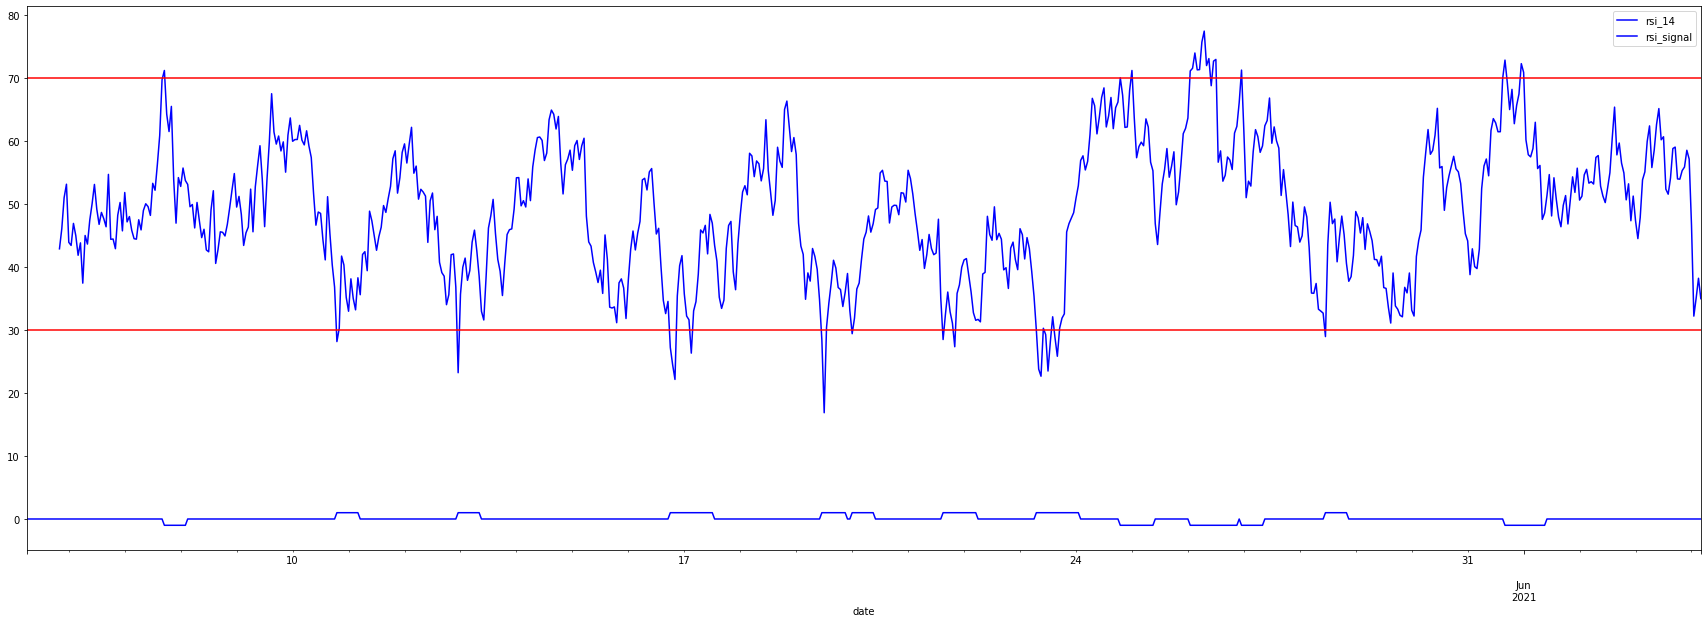

In [25]:
historical_prices_df[['rsi_14', 'rsi_signal']].plot(figsize=(30,10), color=['b', 'b'])
plt.axhline(y=70, color='r', linestyle='-')
plt.axhline(y=30, color='r', linestyle='-')

In [26]:
historical_prices_df.head()

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,avg_loss,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_5,rsi_overbought_preceeding_5,rsi_short,rsi_long,rsi_signal
date,,,,,,,,,,,,,,,,,,,,,
2021-05-05 06:00:00,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869,2021-05-05 06:00:00,0.003856,49.008270,49.008270,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 07:00:00,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184,2021-05-05 07:00:00,0.020236,49.523220,49.512727,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 08:00:00,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00,-0.010436,49.507037,49.500810,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,49.294153,49.302079,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2021-05-05 10:00:00,1620208800000,48.82975,49.13521,48.23689,48.23689,1073.857347,2021-05-05 10:00:00,-0.010436,49.048944,49.074025,...,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 2. MACHINE LEARNING COMPONENT

## Set X-Variable List FOR EACH STRATEGY Filter to Obtain Associated Values

In [29]:
for col in historical_prices_df.columns:
    print(col)

timestamp
open
high
low
close
volume
date
daily_return
EMA_9
EMA_20
EMA_50
EMA_200
crossover_long_9v20
crossover_short_9v20
crossover_signal_9v20
crossover_long_50v200
crossover_short_50v200
crossover_signal_50v200
bollinger_mid_band
bollinger_std
bollinger_upper_band
bollinger_lower_band
bollinger_long
bollinger_short
bollinger_signal
mac_fast_12
mac_slow_26
macd
mac_signal_line_9ema
macd_diff
macd_long
macd_short
macd_signal
change
gain
loss
avg_gain
avg_loss
rs
rsi_14
rsi_oversold
rsi_overbought
rsi_oversold_preceeding_5
rsi_overbought_preceeding_5
rsi_short
rsi_long
rsi_signal


### Define Strategies. 
 >  Strategy 1 = EMA50v200 + BB <br />
 > Strategy 2 = br />
 > Strategy 3 = EMA50v200 + EMA10v20 + MACD

In [30]:
# Set x variable list of features
st1_x_var_list = ['close', 'crossover_signal_50v200', 'bollinger_signal'] #'rsi_signal',
st2_x_var_list = ['close', 'crossover_signal_50v200', 'macd_signal'] #'rsi_signal',
# st3_x_var_list = ['crossover_signal_50v200', 'crossover_signal_9v20', 'macd_signal']

## Strategy 1 - EMA50V200 + Bollinger

In [31]:
historical_prices_df[st1_x_var_list].iloc[550:570]

,crossover_signal_50v200,bollinger_signal
date,,
2021-05-28 04:00:00,-1.0,1.0
2021-05-28 05:00:00,-1.0,1.0
2021-05-28 06:00:00,-1.0,1.0
2021-05-28 07:00:00,-1.0,1.0
2021-05-28 08:00:00,-1.0,1.0
2021-05-28 09:00:00,-1.0,1.0
2021-05-28 10:00:00,-1.0,1.0
2021-05-28 11:00:00,-1.0,1.0
2021-05-28 12:00:00,-1.0,0.0


In [36]:
# Filter by x-variable list
strategy_1 = historical_prices_df[st1_x_var_list]



#DONT DO THIS NOW. MAYBE COME BACK TO IT IN FUTURE
#shift the bollinger signal down, to help find the OPTIMAL Buy/sell time 
# strategy_1['bollinger_shift'] = strategy_1['bollinger_signal'].shift(1)


# Define long and short position conditions
strategy_1['bull_or_bear'] = np.where(strategy_1['crossover_signal_50v200'] == -1, "Bear", "Bull")

# strategy_1.iloc[509:528]
strategy_1.tail(20)



,crossover_signal_50v200,bollinger_signal,bull_or_bear
date,,,
2021-06-03 09:00:00,-1.0,-1.0,Bear
2021-06-03 10:00:00,-1.0,-1.0,Bear
2021-06-03 11:00:00,-1.0,-1.0,Bear
2021-06-03 12:00:00,-1.0,-1.0,Bear
2021-06-03 13:00:00,-1.0,0.0,Bear
2021-06-03 14:00:00,-1.0,0.0,Bear
2021-06-03 15:00:00,-1.0,0.0,Bear
2021-06-03 16:00:00,-1.0,-1.0,Bear
2021-06-03 17:00:00,-1.0,-1.0,Bear


## Program the Conditional Logic for the Trading Strategy

In [37]:


position = 'none'
position_code = 0
positions = []
i = 0

for index, row in strategy_1.iterrows():
    
    # IF BEAR + BOLL == -1, SELL
    if (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == -1):
        position = "sell"
        position_code = -1
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")
    
    
    # ELIF BEAR + BOLL == 1, BUY / EXIT SHORT
    elif (row['crossover_signal_50v200'] == -1) & (row['bollinger_signal'] == 1):
        position = "none"
        position_code = 0
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")
    
    
    # ELIF BULL + BOLL == 1 BUY
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == 1):
        position = "buy"
        position_code = 1
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")    
    
    # ELIF BULL + BOLL == -1, SELL / EXIT LONG
    elif (row['crossover_signal_50v200'] == 1) & (row['bollinger_signal'] == -1):
        position = "none"
        position_code = 0
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")    

    
    # ELSE : O / NA
    else:
        position = position
        positions.append(position_code)
        # positions.append(f"{index}: {position}, {position_code}")

# Double check the dataframes have the same row lengths
display(len(positions))
display(strategy_1.shape)
display(historical_prices_df.shape)

719

(719, 3)

(719, 48)

In [38]:
strategy_1['boll_ema50200_position'] = positions
historical_prices_df['boll_ema50200_position'] = positions
strategy_1[50:70]

,crossover_signal_50v200,bollinger_signal,bull_or_bear,boll_ema50200_position
date,,,,
2021-05-07 08:00:00,-1.0,0.0,Bear,0
2021-05-07 09:00:00,-1.0,0.0,Bear,0
2021-05-07 10:00:00,-1.0,0.0,Bear,0
2021-05-07 11:00:00,-1.0,0.0,Bear,0
2021-05-07 12:00:00,-1.0,-1.0,Bear,-1
2021-05-07 13:00:00,-1.0,-1.0,Bear,-1
2021-05-07 14:00:00,-1.0,-1.0,Bear,-1
2021-05-07 15:00:00,-1.0,-1.0,Bear,-1
2021-05-07 16:00:00,-1.0,-1.0,Bear,-1


In [40]:
historical_prices_df.head(4)

,timestamp,open,high,low,close,volume,date,daily_return,EMA_9,EMA_20,...,rs,rsi_14,rsi_oversold,rsi_overbought,rsi_oversold_preceeding_5,rsi_overbought_preceeding_5,rsi_short,rsi_long,rsi_signal,boll_ema50200_position
date,,,,,,,,,,,,,,,,,,,,,
2021-05-05 06:00:00,1620194400000,48.78026,49.50000,48.30451,49.00827,1044.121869,2021-05-05 06:00:00,0.003856,49.008270,49.008270,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-05 07:00:00,1620198000000,49.34722,51.09462,49.33577,50.00000,3174.144184,2021-05-05 07:00:00,0.020236,49.523220,49.512727,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-05 08:00:00,1620201600000,50.00000,50.04360,48.99300,49.47818,2156.407275,2021-05-05 08:00:00,-0.010436,49.507037,49.500810,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2021-05-05 09:00:00,1620205200000,49.47818,49.47818,48.39390,48.74559,1641.770836,2021-05-05 09:00:00,-0.014806,49.294153,49.302079,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# FROM THIS POINT ONWARDS, ALEX HASN'T DONE ANYTHING

### Shift the DataFrame Index by 1

In [ ]:
historical_prices_df[x_var_list] = historical_prices_df[x_var_list].shift(1)
historical_prices_df[x_var_list].tail()

### Drop NAs and Replace Infs (Positive/Negative Infinity) 

In [ ]:
# Drop NAs and replace positive/negative infinity values
historical_prices_df.dropna(subset=x_var_list, inplace=True)
historical_prices_df.dropna(subset=['daily_return'], inplace=True)
historical_prices_df = historical_prices_df.replace([np.inf, -np.inf], np.nan)
historical_prices_df.head()

### Construct the Dependent Variable

In [ ]:
historical_prices_df['Positive Return'] = np.where(historical_prices_df['daily_return'] > 0, 1.0, 0.0)
historical_prices_df.head()

### Assign Training and Testing Windows